
# <center>Best Neighborhoods in Sao Paulo to Open an Italian Restaurant</center>


<center>Author: Gustavo Testa</center>
<center>April 11, 2020 </center>

 
 
# 1. Introduction/Business Problem 

**Open a italian restaurant** in a big city like **Sao Paulo** could be a risky business - open it in the wrong neighborhood and you are ruined. Data Science offer tools that can help to solve this problem, and **identify the best places in town to open an italian restaurant**. But before we start collecting and analysing data, and in order to achieve success in this task, it is very important to know the business fisrt. The more knowledge you have regarding the busines you are working whth, the better will be your data and any insights you might have. 

THE BUSINES PROBLEM

In order to open a sucessiful italian restaurant in the city, it is very important to define who is your target. Who will eat in the restaurant? The prices of your restaurant are going to be cheap ou expensive? 

In this research, I am going to search for the **best place in town to open a italian restaurant focused on people that are willing to expend more money on it**. So, this research is useful for anyone who wants to open an fancy italian restaurant in the city of Sao Paulo, targeting custumers with high medium to income.

This research will also reveal the top venues in the best areas of Sao Paulo to open an italian restaurant. By knowing the top venues, we can describe better the interest of custumers of that area

To start with,lets import the required libraries to run this notebook:

## Import libraries to run the notebook:

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
import json # library to handle JSON files
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('Libraries imported.')

Libraries imported.


# 2. Data Section

## 2.1 Sources of Data

**Data used in this research comes from 2 sources:**

    a) Google maps
    
    b) FourSquare

Google maps will provide geolocation data to define 91 neighborhoods in Sao Paulo. FourSquare will provide data to identify venues in each of the 91 neighborhoods of the city. K-Means, a machine learning process, will then group neighborhoods into clusters based on the similarities/disimilarities of its venues.

Once all these data is collected, it will be processed and analysed. I will **use K-means, a machine learning unsupervised method** to analise all the venues in the city and group them into neighborhoods cluters, based on its similarities and disimilarities. 

Since we are targeting areas in the city that are visited by people with medium to high income, the clusters identified by the machine learing process are going to be overlaped with the information of the perception of the price by the customer. This will produce powerful insights that will describe and point the best neighborhoods to open a restaurant in Sao Paulo.
 
## 2.2 Data Structure
In order to process and analyse all these information, I will work mainly with **2 dataframes**:

    a) Neighborhoods dataframe

    b) Venues dataframe

Let's describe each of them:

**Neighborhoods dataframe:** it will be named **spdf**, and structured with the following columns:

    • Neighborhood: the name of the Neighborhood
    • Latitude....: the latitude of the Neighborhood
    • Longitude...: the longitude of the Neighborhood
    • Size........: This column will be used to define the relative "Size" of the Neighborhood. Size coud be, for exemplo, the number of expenvive restaurants in the area.

**Venues dataframe**: it will be named **sp_venues**, and structured with the following columns:

    • Neighborhood..........: the name of the Neighborhood
    • Neighborhood Latitude.: the latitude of the Neighborhood
    • Neighborhood Longitude: the longitude of the Neighborhood
    • Venue.................: Venue name
    • Venue Latitude........: Venue latitude
    • Venue Longitude.......: Venue longitude
    • Venue Category........: Venue Category 
    • Price.................: Client evaluation number from 1 (cheap) to 4 (expensive) rating the prices of the Venue.

I will use google maps to build the **neighborhoods dataframe** for the city Sao Paulo (sice this data is not avaliable for download) - se details in item 2.1.

I will use FourSquare API to get venues data for each neighborhood, and store it into the **venues dataframe** , see details in item 2.2.



# 3. Methodology 

## 3.1 Define Neighborhood Database

Since Neighborhoods data was nos avaliable for download, I develop a way get the geolocation (Latitude and Longitude) of 91 neighbohoods of Sao Paulo. The data was retrieved manualy, as follows:

    • An excel file named 'sp-neighborhoods.xls', was created with the following columns:
        • Neighborhood: Store the name of the Neighborhood
        • Latitude: Store the latitude of the Neighborhood
        • Longitude: Store the longitude of the Neighborhood
        • Size: This column will be used to define the relative "Size" of the Neighborhood. Size will receive the total value of restaurants in the neighborhood, filtered by price tags.
   
    • Access maps.google.com/maps and take note of the latitude and longitude of each neighborhood on the spreadsheet described above. 
   
    • Set Column 'Size" equals 10 as default value (it will be modified later)

At the end, I had built a database with 91 neighborhoods for the city of Sao Paulo, with latitude and longitudes. 

In [2]:
#Read into a pandas DataFrame, the Neighborhoods Latitude and Longitude for the city of Sao Paulo:
spdf=pd.read_excel('sp-neighborhoods.xls', index_col=0) 
spdf.head(10)

,Neighborhood,Latitude,Longitude,Size
index,,,,
0,Pinheiros (Paes Leme),-23.566997,-46.696343,10
1,Pinheiros (Fradique),-23.563412,-46.684643,10
2,Vila Madalena,-23.553547,-46.688649,10
3,Alto de Pinheiros,-23.553213,-46.708974,10
4,Boacava,-23.541327,-46.720548,10
5,Clinicas,-23.556694,-46.675425,10
6,Pacaembu,-23.546327,-46.668858,10
7,Jardim Europa,-23.574492,-46.681769,10
8,Itaim,-23.584443,-46.679146,10


As explained before, **size** is set a constant value for now. We will deal with this column later.

### 3.1.1 Display Neighborhoods with Folium

To visualize all 91 neighbohoods, I will use the function below:


In [3]:
def display_neighborhoods(df,f):    
    map_SP = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)
    # add markers to map
    maxsize=df['Size'].max()
    for lat, lng, neighborhood, size in zip(df['Latitude'], df['Longitude'], df['Neighborhood'],df['Size']):
        label = '{}'.format(neighborhood)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=6*f*size/maxsize,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_SP)
    return map_SP
    

In [4]:
display_neighborhoods(spdf,1)

... and just in case the Folium image above does not show in GitHub, I captured it in a JPG format below:

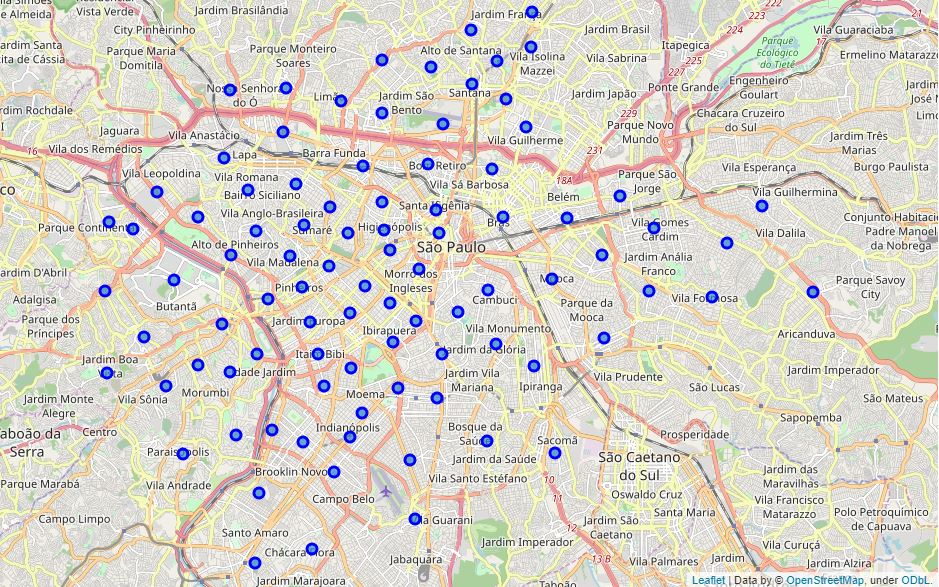

In [5]:
from IPython.display import Image
Image(filename='sp-neighborhoods.JPG') 

### Calculate the average distance between neighborhoods:
Lets calculate the average distace between neighborhoods. This parameter will be used ahead, when making a request to FourSquare API.

The funcion below calculate the distance between 2 points using Latitudes and Longitudes:

In [6]:
from math import cos, asin, sqrt, pi
def distance(lat1, lon1, lat2, lon2):
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 12742 * asin(sqrt(a)) 

The loop below build a Distance Matrix. For each point (Neighborhood) is calculated the distance for every other point (Neighborhood) in spdf dataframe:

In [7]:
distance_between_neighborhoods = np.zeros([spdf.shape[0],spdf.shape[0]])
for i in range(0,spdf.shape[0]):
    for j in range(0,spdf.shape[0]):
        if i == j:
            distance_between_neighborhoods[i,j] = 9999999.  #Distance from 'itself' should not be considered 
        else:
            distance_between_neighborhoods[i,j] = distance (spdf.iloc[i,1],spdf.iloc[i,2],spdf.iloc[j,1],spdf.iloc[j,2]) 

The loop below get the minimum distance that each Neighborhood is from is closest neighbor:

In [8]:
smallest_distance_between_neighborhoods = []
for i in range(0,spdf.shape[0]):
    smallest_distance_between_neighborhoods.append(distance_between_neighborhoods[i,:].min())
df_smallest_distance_between_neighborhoods = pd.DataFrame(smallest_distance_between_neighborhoods)
df_smallest_distance_between_neighborhoods.columns=['Distance between Neighborhoods Venues']
df_smallest_distance_between_neighborhoods.describe()

,Distance between Neighborhoods Venues
count,91.000000
mean,1.459429
std,0.447308
min,0.741260
25%,1.137664
50%,1.387757
75%,1.720193
max,3.452532


### From the above, we conclude:
**The Average distance between Neighborhoods** is aproximately **1.46km**

The 1st and 3rd Quartile are: 1.13km and 1.72 km 

**The radius to pass to Foursquare API** should be 1.46km / 2 = aprox. **750m**

## 3.2 Get Venues from Foursquare
To build our database **sp_venues** described in item 2. of this report, I need to make a foursquare request, using the GET method and the EXPLORE endpoint to retrieve the data.

The Foursquare request will have the following information:

    • CLIENT_ID ...: Personal info for 'login'
    • CLIENT_SECRET: Personal info for 'login'
    • VERSION .....: Foursquare API version
    • price_filter : Price filter from 1 to 4
    • LIMIT .......: Maximum number of venues to return in the request
    • RADIUS ......: All venues found within this radius will be returned in the request 

In [8]:
CLIENT_ID = 'JQG5FSEDWNAKRBKQRF3ZVD4Y2TCPWJN0Y0ZCBRD5LXPQOR1K' # your Foursquare ID

CLIENT_SECRET = 'P5IDUFL0YMGDLETV5Y3XPEY504VUHNRXIVFBIHYCPMEGOARS' # your Foursquare Secret

VERSION = '20180605' # Foursquare API version

LIMIT = 120 # limit of number of venues returned by Foursquare API

RADIUS = 750 # define radius

### Function to get venues from Forsquare:

In [443]:
def getNearbyVenues(names, latitudes, longitudes, price_filter):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name, ' ( R=',RADIUS,', Price=',price_filter,')')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&price={}'.format(               
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            RADIUS, 
            LIMIT,
            price_filter)
            
        # make the GET request        
        results = requests.get(url).json()
        
        if str(results).find('groups') > 0:
            results=results["response"]['groups'][0]['items']        
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Get venues from Foursquare:

Data will be retrieved in four parts, each part having the venues for a specific price filter:

    • sp_venues_p1: all venues having price = 1 (cheaper)
    • sp_venues_p2: all venues having price = 2 
    • sp_venues_p3: all venues having price = 3 
    • sp_venues_p4: all venues having price = 4 (expensive)
    
Then, all these 4 dataframes will be merged into a bigger one:

    • sp_venues: list of all venues in the city of Sao Paulo, having prices from 1 to 4

In [400]:
sp_venues_p1 = getNearbyVenues(names=spdf['Neighborhood'],latitudes=spdf['Latitude'],longitudes=spdf['Longitude'],price_filter=1)

Pinheiros (Paes Leme)  ( R= 750 , Price= 1 )
Pinheiros (Fradique)  ( R= 750 , Price= 1 )
Vila Madalena  ( R= 750 , Price= 1 )
Alto de Pinheiros  ( R= 750 , Price= 1 )
Boacava  ( R= 750 , Price= 1 )
Clinicas  ( R= 750 , Price= 1 )
Pacaembu  ( R= 750 , Price= 1 )
Jardim Europa  ( R= 750 , Price= 1 )
Itaim  ( R= 750 , Price= 1 )
Vila Olimpia  ( R= 750 , Price= 1 )
Brooklyn  ( R= 750 , Price= 1 )
Vila Funchal  ( R= 750 , Price= 1 )
Moema  ( R= 750 , Price= 1 )
Indianopolis  ( R= 750 , Price= 1 )
Campo Belo  ( R= 750 , Price= 1 )
Vila Nova Conceicao  ( R= 750 , Price= 1 )
Pq Ibirapuera  ( R= 750 , Price= 1 )
Cerqueira Cesar  ( R= 750 , Price= 1 )
Jardins  ( R= 750 , Price= 1 )
Pamplona  ( R= 750 , Price= 1 )
Consolacao  ( R= 750 , Price= 1 )
Higienopolis  ( R= 750 , Price= 1 )
Perdizes  ( R= 750 , Price= 1 )
Sumare  ( R= 750 , Price= 1 )
Vila Beatriz  ( R= 750 , Price= 1 )
Lapa  ( R= 750 , Price= 1 )
Agua Branca  ( R= 750 , Price= 1 )
Barra Funda  ( R= 750 , Price= 1 )
Bixiga  ( R= 750 , Pr

Ok, it worked! So let's get the next tree venues list for price tags 2, 3 and 4:

In [422]:
sp_venues_p2 = getNearbyVenues(names=spdf['Neighborhood'],latitudes=spdf['Latitude'],longitudes=spdf['Longitude'],price_filter=2)
sp_venues_p3 = getNearbyVenues(names=spdf['Neighborhood'],latitudes=spdf['Latitude'],longitudes=spdf['Longitude'],price_filter=3)
sp_venues_p4 = getNearbyVenues(names=spdf['Neighborhood'],latitudes=spdf['Latitude'],longitudes=spdf['Longitude'],price_filter=4)

... and add the price tag to each respective dataframe:

In [408]:
sp_venues_p1['Price']=1
sp_venues_p2['Price']=2
sp_venues_p3['Price']=3
sp_venues_p4['Price']=4

### Create dataframe sp_venues:

And now let's concatenate all 4 databases (each one for a specific price tag) into sp_venues:

In [409]:
sp_venues = pd.concat([sp_venues_p1,sp_venues_p2,sp_venues_p3,sp_venues_p4])

In [415]:
print('Total venues in sp_venues ..................: ',sp_venues.shape[0])
print('Total venues in sp_venues_pi (i from 1 to 4): ',sp_venues_p1.shape[0]+sp_venues_p2.shape[0]+sp_venues_p3.shape[0]+sp_venues_p4.shape[0])

Total venues in sp_venues ..................:  4647
Total venues in sp_venues_pi (i from 1 to 4):  4647


Once concateneted, the total number of venues to be analysed in the city of Sao Paulo is 4647 venues.

In [214]:
#Get Neighborhoods with number of Venues < 10:
n_venues = sp_venues[['Venue','Neighborhood']].groupby('Neighborhood').count().sort_values('Venue')
n_venues[n_venues['Venue']<15].index

Index(['Chacara Flora', 'Favela Paraisopolis', 'Jaguare', 'Alto de Pinheiros',
       'Jokey Clube', 'Piqueri', 'Vila Guilherme', 'Morumbi', 'Boacava',
       'Favela Sao Remo (Jaguare)', 'Butanta-USP', 'Parque Anhembi',
       'Rio Pequeno'],
      dtype='object', name='Neighborhood')

And **sp_venues** dataframe looks like this:

In [447]:
sp_venues.head(20)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Price
0,Pinheiros (Paes Leme),-23.566997,-46.696343,Pitico,-23.566305,-46.696066,Beer Garden,1
1,Pinheiros (Paes Leme),-23.566997,-46.696343,Comedoria,-23.567765,-46.697848,Buffet,1
2,Pinheiros (Paes Leme),-23.566997,-46.696343,Bráz Elettrica,-23.566013,-46.695895,Pizza Place,1
3,Pinheiros (Paes Leme),-23.566997,-46.696343,St. Chico Padaria,-23.565137,-46.695565,Bakery,1
4,Pinheiros (Paes Leme),-23.566997,-46.696343,Um Coffee Co.,-23.568214,-46.698818,Coffee Shop,1
5,Pinheiros (Paes Leme),-23.566997,-46.696343,Remelexo Brasil,-23.567562,-46.698365,Nightclub,1
6,Pinheiros (Paes Leme),-23.566997,-46.696343,Neko's Burger,-23.567836,-46.699692,Burger Joint,1
7,Pinheiros (Paes Leme),-23.566997,-46.696343,Lupe Bar Y Taqueria,-23.563541,-46.693151,Taco Place,1
8,Pinheiros (Paes Leme),-23.566997,-46.696343,Joe King Coffee Shop,-23.563789,-46.695761,Coffee Shop,1
9,Pinheiros (Paes Leme),-23.566997,-46.696343,Buzina,-23.563703,-46.692851,Burger Joint,1


I am going to store each of these dafatrames into an excel file, so I can load these data easily next time:

In [411]:
sp_venues_p1.to_excel('sp_venues_p1.xls')
sp_venues_p2.to_excel('sp_venues_p2.xls')
sp_venues_p3.to_excel('sp_venues_p3.xls')
sp_venues_p4.to_excel('sp_venues_p4.xls')
sp_venues.to_excel('sp_venues.xls')

... and if i need to load them again, I just uncomment the follwing:

In [252]:
#Read data from 4 excel file:
#sp_venues_p1 = pd.read_excel('sp_venues_p1.xls')
#sp_venues_p2 = pd.read_excel('sp_venues_p2.xls')
#sp_venues_p3 = pd.read_excel('sp_venues_p3.xls')
#sp_venues_p4 = pd.read_excel('sp_venues_p4.xls')
#sp_venues = pd.read_excel('sp_venues.xls')
#sp_venues_p1.drop(['Unnamed: 0'],axis=1,inplace=True)
#sp_venues_p2.drop(['Unnamed: 0'],axis=1,inplace=True)
#sp_venues_p3.drop(['Unnamed: 0'],axis=1,inplace=True)
#sp_venues_p4.drop(['Unnamed: 0'],axis=1,inplace=True)
#sp_venues.drop(['Unnamed: 0'],axis=1,inplace=True)

### List venues for each Price tag in Sao Paulo:
First, lets create a dataframe for each price tag. These dataframe shoud have:

    • Neighborhood: Neighborhood Name    
    • Latitude and Longitude of the Neighborhood 
    • Price: Price Tag (1, 2, 3 or 4)
    • Size: Equals que total number of venues in the neighborhood for the Price Tag specified in Column "Price".
    
Lets prepare the dataframes:


### All Venues (total), grouped by Neighborhood:

In [253]:
#Group rows by Neighborhood, then sum values of Price, sorting by Price. 
sp_prices_4 = sp_venues_p4[['Neighborhood','Price']].groupby('Neighborhood').sum().sort_values('Price',ascending=False)
sp_prices_3 = sp_venues_p3[['Neighborhood','Price']].groupby('Neighborhood').sum().sort_values('Price',ascending=False)
sp_prices_2 = sp_venues_p2[['Neighborhood','Price']].groupby('Neighborhood').sum().sort_values('Price',ascending=False)
sp_prices_1 = sp_venues_p1[['Neighborhood','Price']].groupby('Neighborhood').sum().sort_values('Price',ascending=False)
#Get Latitudes ans Longitudes from spdf dataframe:
sp_prices_1 = sp_prices_1.reset_index().merge(spdf, on = "Neighborhood", how = "inner")
sp_prices_2 = sp_prices_2.reset_index().merge(spdf, on = "Neighborhood", how = "inner")
sp_prices_3 = sp_prices_3.reset_index().merge(spdf, on = "Neighborhood", how = "inner")
sp_prices_4 = sp_prices_4.reset_index().merge(spdf, on = "Neighborhood", how = "inner")
#Update 'Size' with total values of 'Price' Column:
sp_prices_1['Venues'] = sp_prices_1['Price']
sp_prices_2['Venues'] = sp_prices_2['Price']//2
sp_prices_3['Venues'] = sp_prices_3['Price']//3
sp_prices_4['Venues'] = sp_prices_4['Price']//4
sp_prices_1['Size'] = sp_prices_1['Price']
sp_prices_2['Size'] = sp_prices_2['Price']//2
sp_prices_3['Size'] = sp_prices_3['Price']//3
sp_prices_4['Size'] = sp_prices_4['Price']//4

### Restaurants Only (total), grouped by neighborhood:

In [254]:
#FILTER BY RESTAURANTS, Group rows by Neighborhood, then sum values of Price, sorting by Price. Normalize total values for tags 1 to 3.
sp_prices_4res = sp_venues_p4[sp_venues_p4['Venue Category'].str.contains("Restaurant")][['Neighborhood','Price']].groupby('Neighborhood').sum().sort_values('Price',ascending=False)
sp_prices_3res = sp_venues_p3[sp_venues_p3['Venue Category'].str.contains("Restaurant")][['Neighborhood','Price']].groupby('Neighborhood').sum().sort_values('Price',ascending=False)
sp_prices_2res = sp_venues_p2[sp_venues_p2['Venue Category'].str.contains("Restaurant")][['Neighborhood','Price']].groupby('Neighborhood').sum().sort_values('Price',ascending=False)
sp_prices_1res = sp_venues_p1[sp_venues_p1['Venue Category'].str.contains("Restaurant")][['Neighborhood','Price']].groupby('Neighborhood').sum().sort_values('Price',ascending=False)
#Get Latitudes ans Longitudes from spdf dataframe:
sp_prices_1res = sp_prices_1res.reset_index().merge(spdf, on = "Neighborhood", how = "inner")
sp_prices_2res = sp_prices_2res.reset_index().merge(spdf, on = "Neighborhood", how = "inner")
sp_prices_3res = sp_prices_3res.reset_index().merge(spdf, on = "Neighborhood", how = "inner")
sp_prices_4res = sp_prices_4res.reset_index().merge(spdf, on = "Neighborhood", how = "inner")
#Update 'Size' with total values of 'Price' Column:
sp_prices_1res['Restaurants'] = sp_prices_1res['Price']
sp_prices_2res['Restaurants'] = sp_prices_2res['Price']//2
sp_prices_3res['Restaurants'] = sp_prices_3res['Price']//3
sp_prices_4res['Restaurants'] = sp_prices_4res['Price']//4
sp_prices_1res['Size'] = sp_prices_1res['Price']
sp_prices_2res['Size'] = sp_prices_2res['Price']//2
sp_prices_3res['Size'] = sp_prices_3res['Price']//3
sp_prices_4res['Size'] = sp_prices_4res['Price']//4

## 4. Results
### Where are Italian Restaurants in Sao Paulo

In [255]:
sp_filter='Italian Restaurant'
sp_italian_rest = sp_venues[sp_venues['Venue Category']==sp_filter]
sp_italian_group = sp_italian_rest.groupby('Neighborhood').count().sort_values("Venue Category", ascending=False)
#sp_italian_group.columns.name=['Total Italian Restaurants']
sp_italian_group=sp_italian_group[['Price']].reset_index()
sp_italian_group[:10]

,Neighborhood,Price
0,Itaim,19
1,Cerqueira Cesar,18
2,Pinheiros (Fradique),11
3,Chacara Santo Antonio,11
4,Jardins,10
5,Vila Olimpia,10
6,Moema,7
7,Bixiga,7
8,Vila Nova Conceicao,7
9,Pamplona,7


Lets visualize in a Folium map:

In [256]:
sp_italian_group = sp_italian_group.reset_index().merge(spdf, on = "Neighborhood", how = "inner")
sp_italian_group['Size']=sp_italian_group['Price']

In [257]:
print ('\nPrice TAG = 1 ($) \nTotal Italian Restaurants in Sao Paulo per Neighborhood')
display_neighborhoods(sp_italian_group,4)


Price TAG = 1 ($) 
Total Italian Restaurants in Sao Paulo per Neighborhood


### Top 10 Neighborhoods with Price Tag = 1 

In [258]:
print ('\nPrice TAG = 1\nTotal Venues by Neighborhood:')
sp_prices_1[['Neighborhood','Venues']].head(10)


Price TAG = 1
Total Venues by Neighborhood:


,Neighborhood,Venues
0,Pinheiros (Fradique),41
1,Consolacao,39
2,Pinheiros (Paes Leme),39
3,Tucuruvi,37
4,Ahangabau,36
5,Vila Clementino,35
6,Vila Mariana,34
7,Paraiso,34
8,Clinicas,34
9,Bixiga,32


In [259]:
print ('\nPrice TAG = 1\nTotal Restaurants by Neighborhood:')
sp_prices_1res[['Neighborhood','Restaurants']].head(10)


Price TAG = 1
Total Restaurants by Neighborhood:


,Neighborhood,Restaurants
0,Clinicas,7
1,Tucuruvi,7
2,Barra Funda,6
3,Santa Ifigenia,6
4,Paraiso,5
5,Santa Cecilia,5
6,Higienopolis,5
7,Pinheiros (Fradique),4
8,Mooca,4
9,Vila Clementino,4


### Top 10 Neighborhoods with Price Tag = 2

In [260]:
print ('\nPrice TAG = 2\nTotal Venues by Neighborhood:')
sp_prices_2[['Neighborhood','Venues']].head(10)


Price TAG = 2
Total Venues by Neighborhood:


,Neighborhood,Venues
0,Itaim,83
1,Pinheiros (Fradique),81
2,Pamplona,80
3,Pinheiros (Paes Leme),78
4,Moema,77
5,Consolacao,73
6,Ahangabau,71
7,Cerqueira Cesar,69
8,Chacara Santo Antonio,64
9,Paraiso,64


In [261]:
print ('\nPrice TAG = 2\nTotal Restaurants by Neighborhood:')
sp_prices_2res[['Neighborhood','Restaurants']].head(10)


Price TAG = 2
Total Restaurants by Neighborhood:


,Neighborhood,Restaurants
0,Itaim,59
1,Pamplona,52
2,Pinheiros (Paes Leme),52
3,Pinheiros (Fradique),46
4,Ahangabau,45
5,Moema,45
6,Chacara Santo Antonio,38
7,Paraiso,37
8,Cerqueira Cesar,36
9,Consolacao,33


### Top 10 Neighborhoods with Price Tag = 3

In [262]:
print ('\nPrice TAG = 3\nTotal Venues by Neighborhood:')
sp_prices_3[['Neighborhood','Venues']].head(10)


Price TAG = 3
Total Venues by Neighborhood:


,Neighborhood,Venues
0,Itaim,53
1,Cerqueira Cesar,49
2,Vila Olimpia,30
3,Ahangabau,22
4,Pamplona,22
5,Pinheiros (Paes Leme),22
6,Consolacao,21
7,Vila Nova Conceicao,20
8,Moema,20
9,Clinicas,18


In [263]:
print ('\nPrice TAG = 3\nTotal Restaurants by Neighborhood:')
sp_prices_3res[['Neighborhood','Restaurants']].head(10)


Price TAG = 3
Total Restaurants by Neighborhood:


,Neighborhood,Restaurants
0,Itaim,34
1,Cerqueira Cesar,28
2,Vila Olimpia,14
3,Vila Nova Conceicao,11
4,Jardins,11
5,Pinheiros (Fradique),10
6,Moema,9
7,Chacara Santo Antonio,8
8,Higienopolis,8
9,Santa Cecilia,8


### Top 10 Neighborhoods with Price Tag = 4

In [264]:
print ('\nPrice TAG = 4\nTotal Venues by Neighborhood:')
sp_prices_4[['Neighborhood','Venues']].head(10)


Price TAG = 4
Total Venues by Neighborhood:


,Neighborhood,Venues
0,Itaim,5
1,Vila Olimpia,5
2,Cerqueira Cesar,5
3,Vila Gomes Cardim,4
4,Ahangabau,3
5,Bosque da Saude,3
6,Jardim Europa,3
7,Aclimacao,2
8,Pinheiros (Fradique),2
9,Tatuape,2


In [265]:
print ('\nPrice TAG = 4\nTotal Restaurants by Neighborhood:')
sp_prices_4res[['Neighborhood','Restaurants']].head(10)


Price TAG = 4
Total Restaurants by Neighborhood:


,Neighborhood,Restaurants
0,Cerqueira Cesar,3
1,Pinheiros (Fradique),2
2,Vila Madalena,2
3,Ahangabau,1
4,Bosque da Saude,1
5,Itaim,1
6,Jardim Europa,1
7,Jardins,1
8,Pamplona,1
9,Perdizes,1


### Visualize Total Restaurants and Venues in Follium Map, grouped by Neighborhoods

    • Each circle in the folium map is a Neighborhood
    • The bigger the radius of the circle, greater the number of venues / Restaurants in that area. 


In [266]:
print ('\nPrice TAG = 1 ($) \nTotal Venues by Neighborhood:')
display_neighborhoods(sp_prices_1,3)


Price TAG = 1 ($) 
Total Venues by Neighborhood:


In [267]:
print ('\nPrice TAG = 2 ($$)\nTotal Venues by Neighborhood:')
display_neighborhoods(sp_prices_2,3)


Price TAG = 2 ($$)
Total Venues by Neighborhood:


In [268]:
print ('\nPrice TAG = 3 ($$$)\nTotal Venues by Neighborhood:')
display_neighborhoods(sp_prices_3,3)


Price TAG = 3 ($$$)
Total Venues by Neighborhood:


So, ass we can see, **2 neighborhoods concentrate most number of expensive restaurants (with Price tag = 3) in Sao Paulo.**

In [269]:
print ('\nPrice TAG = 4 ($$$$)\nTotal Venues by Neighborhood:')
display_neighborhoods(sp_prices_4,3)


Price TAG = 4 ($$$$)
Total Venues by Neighborhood:


... and just in case the Folium images above does not show in GitHub, I will display an JPG image for price TAG = 3:

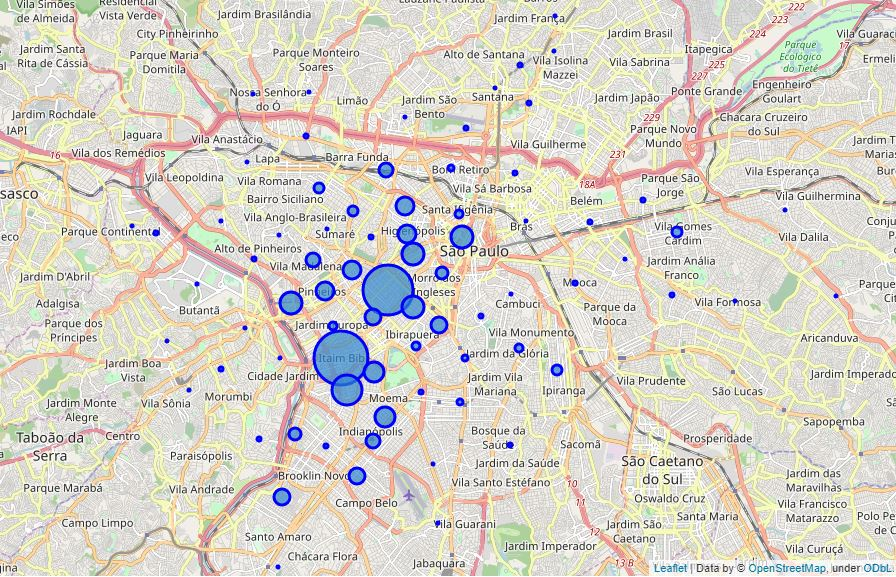

In [270]:
from IPython.display import Image
Image(filename='sp-total-venues-p3.JPG') 

### One Hot Encoding:

In [271]:
sp_venues_f = sp_venues

In [272]:
sp_venues['Venue Category'].unique()[:10]

array(['Beer Garden', 'Buffet', 'Pizza Place', 'Bakery', 'Coffee Shop',
       'Nightclub', 'Burger Joint', 'Taco Place', 'Breakfast Spot',
       'Dessert Shop'], dtype=object)

In [273]:
sp_venues_f.shape

(4647, 8)

In [274]:
#Drop Price
sp_venues_f.drop('Price',1).head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Pinheiros (Paes Leme),-23.566997,-46.696343,Pitico,-23.566305,-46.696066,Beer Garden
1,Pinheiros (Paes Leme),-23.566997,-46.696343,Comedoria,-23.567765,-46.697848,Buffet
2,Pinheiros (Paes Leme),-23.566997,-46.696343,Bráz Elettrica,-23.566013,-46.695895,Pizza Place
3,Pinheiros (Paes Leme),-23.566997,-46.696343,St. Chico Padaria,-23.565137,-46.695565,Bakery
4,Pinheiros (Paes Leme),-23.566997,-46.696343,Um Coffee Co.,-23.568214,-46.698818,Coffee Shop


In [275]:
len(sp_venues_f['Venue Category'].unique())

153

In [276]:
group_column = ['Venue Category']
sp_onehot = pd.get_dummies(sp_venues_f[group_column], prefix="", prefix_sep="")
sp_onehot['Price'] = sp_venues_f['Price']
sp_onehot['Neighborhood'] = sp_venues_f['Neighborhood']
# move neighborhood column to the first column
fixed_columns = [sp_onehot.columns[-1]] + [sp_onehot.columns[-2]] + list(sp_onehot.columns[:-2])
sp_onehot = sp_onehot[fixed_columns]
sp_onehot.head()

,Neighborhood,Price,Acai House,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Theater,Theme Park,Thrift / Vintage Store,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
0,Pinheiros (Paes Leme),1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Pinheiros (Paes Leme),1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Pinheiros (Paes Leme),1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Pinheiros (Paes Leme),1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Pinheiros (Paes Leme),1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [277]:
#sp_onehot['Price']= sp_onehot['Price'].astype(int)

In [278]:
sp_onehot.shape

(4647, 155)

In [279]:
sp_grouped = sp_onehot.groupby('Neighborhood').mean().reset_index()
sp_grouped_wp = sp_grouped.drop("Price", axis = 1)

In [280]:
sp_grouped_wp.head()

,Neighborhood,Acai House,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Theater,Theme Park,Thrift / Vintage Store,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
0,Aclimacao,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.024390,0.0,0.0,0.000000,0.0,0.0
1,Agua Branca,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,Agua Rasa,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,Ahangabau,0.0,0.0,0.007576,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007576,0.0,0.0,0.0,0.037879,0.0,0.0,0.007576,0.0,0.0
4,Alto de Pinheiros,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


### Number of Neighborhoods in sp_grouped:

In [281]:
sp_grouped.shape

(91, 155)

In [282]:
sp_grouped.head()

,Neighborhood,Price,Acai House,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Theater,Theme Park,Thrift / Vintage Store,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
0,Aclimacao,1.804878,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.024390,0.0,0.0,0.000000,0.0,0.0
1,Agua Branca,2.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,Agua Rasa,1.718750,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,Ahangabau,1.939394,0.0,0.0,0.007576,0.0,0.0,0.0,0.0,0.0,...,0.007576,0.0,0.0,0.0,0.037879,0.0,0.0,0.007576,0.0,0.0
4,Alto de Pinheiros,1.800000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


### Total Italian Restaurants per Neighborhood:

In [283]:
sp_filter='Italian Restaurant'
sp_grouped[['Neighborhood',sp_filter]].sort_values(sp_filter, ascending=False)[:10]

,Neighborhood,Italian Restaurant
42,Jardins,0.185185
20,Cerqueira Cesar,0.124138
39,Jardim Europa,0.120000
34,Itaim,0.112426
36,Jaguare,0.100000
46,Mandaqui,0.100000
22,Chacara Santo Antonio,0.100000
18,Carandiru,0.100000
84,Vila Nova Conceicao,0.098592
88,Vila Reg. Feijo,0.093750


### Top 5 Venues for each Neighborhood:

In [284]:
num_top_venues = 5

for hood in sp_grouped_wp['Neighborhood']:
    print("----"+hood+"----")
    temp = sp_grouped_wp[sp_grouped_wp['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 3})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aclimacao----
              venue   freq
0       Pizza Place  0.122
1         BBQ Joint  0.098
2               Bar  0.098
3            Bakery  0.098
4  Sushi Restaurant  0.073


----Agua Branca----
                    venue  freq
0    Brazilian Restaurant  0.30
1              Restaurant  0.20
2    Fast Food Restaurant  0.10
3                     Bar  0.10
4  Furniture / Home Store  0.05


----Agua Rasa----
                  venue   freq
0  Brazilian Restaurant  0.156
1          Burger Joint  0.156
2                   Bar  0.094
3               Brewery  0.062
4           Pizza Place  0.062


----Ahangabau----
                  venue   freq
0  Brazilian Restaurant  0.174
1                  Café  0.098
2           Coffee Shop  0.083
3                Bakery  0.068
4                   Bar  0.061


----Alto de Pinheiros----
                  venue  freq
0           Coffee Shop   0.2
1                  Café   0.2
2                   Bar   0.2
3  Fast Food Restaurant   0.1
4           Snac

                       venue   freq
0         Italian Restaurant  0.185
1       Brazilian Restaurant  0.093
2                     Bakery  0.074
3               Burger Joint  0.056
4  Middle Eastern Restaurant  0.056


----Jokey Clube----
          venue  freq
0    Restaurant   0.4
1          Café   0.2
2     Racetrack   0.1
3  Burger Joint   0.1
4     Nightclub   0.1


----Lapa----
                  venue   freq
0            Restaurant  0.125
1  Brazilian Restaurant  0.125
2                Bakery  0.100
3        Ice Cream Shop  0.050
4           Pizza Place  0.050


----Limao----
                 venue   freq
0           Restaurant  0.200
1               Bakery  0.167
2                  Bar  0.167
3         Burger Joint  0.100
4  Japanese Restaurant  0.067


----Mandaqui----
                       venue  freq
0                Pizza Place  0.15
1       Brazilian Restaurant  0.15
2                 Restaurant  0.10
3                     Bakery  0.10
4  Middle Eastern Restaurant  0.10


--

### Most Comon Venues:

In [285]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)    
    return row_categories_sorted.index.values[0:num_top_venues]

In [286]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sp_grouped_wp['Neighborhood'] 

for ind in np.arange(sp_grouped_wp.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sp_grouped_wp.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aclimacao,Pizza Place,Bar,Bakery,BBQ Joint,Korean Restaurant,Sushi Restaurant,Dessert Shop,Chinese Restaurant,Steakhouse,Burger Joint
1,Agua Branca,Brazilian Restaurant,Restaurant,Bar,Fast Food Restaurant,Pizza Place,Food Truck,Coffee Shop,BBQ Joint,Furniture / Home Store,Churrascaria
2,Agua Rasa,Brazilian Restaurant,Burger Joint,Bar,Pizza Place,Brewery,Bakery,Sushi Restaurant,Deli / Bodega,Coffee Shop,Restaurant
3,Ahangabau,Brazilian Restaurant,Café,Coffee Shop,Bakery,Bar,Restaurant,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Italian Restaurant,Dessert Shop
4,Alto de Pinheiros,Café,Coffee Shop,Bar,Fast Food Restaurant,Food Truck,Snack Place,Restaurant,Yoga Studio,English Restaurant,Farmers Market


In [287]:
neighborhoods_venues_sorted.shape[0]

91

### Cluster Neighborhoods with K-Means:
number of clusters = 4

In [288]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 4
sp_grouped_clustering = sp_grouped_wp.drop('Neighborhood', 1)
# k-means clustering:
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sp_grouped_clustering)

In [289]:
# check cluster labels and count:
pd.DataFrame(kmeans.labels_)[0].value_counts()

1    51
3    19
2    16
0     5
Name: 0, dtype: int64

In [290]:
sp_prices_3b.shape

(76, 3)

In [291]:
# add clustering labels
spdf_f = spdf
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
sp_merged_all = spdf_f
# merge data to add latitude/longitude for each neighborhood
sp_merged_all = sp_merged_all.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
sp_merged_all = sp_merged_all.join(sp_grouped[['Neighborhood','Price']].set_index('Neighborhood'), on='Neighborhood')
sp_merged_all.drop('Size',1).head()


,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Price
index,,,,,,,,,,,,,,,
0,Pinheiros (Paes Leme),-23.566997,-46.696343,3,Brazilian Restaurant,Burger Joint,Restaurant,Coffee Shop,Bar,Japanese Restaurant,Café,Italian Restaurant,Nightclub,Vegetarian / Vegan Restaurant,1.907801
1,Pinheiros (Fradique),-23.563412,-46.684643,1,Italian Restaurant,Brazilian Restaurant,Restaurant,Bar,Burger Joint,Pizza Place,Japanese Restaurant,Coffee Shop,Dessert Shop,Vegetarian / Vegan Restaurant,1.858156
2,Vila Madalena,-23.553547,-46.688649,1,Bar,Pizza Place,Restaurant,Ice Cream Shop,Bakery,Brazilian Restaurant,Burger Joint,Café,Cocktail Bar,Vegetarian / Vegan Restaurant,1.923077
3,Alto de Pinheiros,-23.553213,-46.708974,1,Café,Coffee Shop,Bar,Fast Food Restaurant,Food Truck,Snack Place,Restaurant,Yoga Studio,English Restaurant,Farmers Market,1.800000
4,Boacava,-23.541327,-46.720548,2,Snack Place,Sushi Restaurant,Bakery,Speakeasy,Japanese Restaurant,Burger Joint,Juice Bar,Brazilian Restaurant,Pizza Place,Falafel Restaurant,1.666667


In [292]:
sp_merged_all.shape

(91, 16)

### Vizualize Neighborhoods Clusters in folium Map:

In [293]:
sp_merged = sp_merged_all

# create Folium map for Toronto Neighborhoods:
map_clusters = folium.Map(location=[spdf_f.loc[2,'Latitude'], spdf_f.loc[2,'Longitude'] ], zoom_start=12)

# set color scheme for the clusters:
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['red', 'blue', 'green', 'purple', 'orange', 'darkred','lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
#           'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen','gray', 'black', 'lightgray']

# add markers to the map:
markers_colors = []
for lat, lon, poi, cluster, size in zip(sp_merged['Latitude'], sp_merged['Longitude'], sp_merged['Neighborhood'], sp_merged['Cluster Labels'], sp_merged['Size']):    
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color='black',  #rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.6).add_to(map_clusters)
        
map_clusters

### K-MEANS CLUSTER RADIUS = AVERAGE PRICE TAG PER NEIGHBORHOOD

In [294]:
sp_merged=sp_merged_all

In [295]:
# create Folium map for Toronto Neighborhoods:
map_clusters = folium.Map(location=[spdf_f.loc[2,'Latitude'], spdf_f.loc[2,'Longitude'] ], zoom_start=12)

# set color scheme for the clusters:
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['red', 'blue', 'green', 'purple', 'orange', 'darkred','lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
#           'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen','gray', 'black', 'lightgray']

# add markers to the map:
markers_colors = []
for lat, lon, poi, cluster, size in zip(sp_merged['Latitude'], sp_merged['Longitude'], sp_merged['Neighborhood'], sp_merged['Cluster Labels'], sp_merged['Price']):    
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=size**5/3,
        popup=label,
        color='black',  #rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.6).add_to(map_clusters)
       
map_clusters

In [297]:
aux=sp_merged
col=aux.columns.to_list()
sel_col=col[0:8]+[col[-1]]
#aux.rename(columns={'Average Price','Price'},inplace=True)
aux[sel_col].drop(['Size','Latitude','Longitude'], axis=1).sort_values('Price',ascending=False)[:10]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Price
index,,,,,,
17,Cerqueira Cesar,1,Italian Restaurant,Restaurant,Coffee Shop,2.255172
8,Itaim,1,Italian Restaurant,Japanese Restaurant,Bar,2.207101
7,Jardim Europa,1,Italian Restaurant,Brazilian Restaurant,Middle Eastern Restaurant,2.200000
9,Vila Olimpia,1,Italian Restaurant,Bar,Steakhouse,2.172727
18,Jardins,1,Italian Restaurant,Brazilian Restaurant,Bakery,2.111111
15,Vila Nova Conceicao,1,Restaurant,Italian Restaurant,Burger Joint,2.098592
12,Moema,1,Brazilian Restaurant,Japanese Restaurant,Italian Restaurant,2.035398
85,Parque Anhembi,3,Brazilian Restaurant,Bar,Nightclub,2.000000
26,Agua Branca,3,Brazilian Restaurant,Restaurant,Bar,2.000000


### K-MEANS CLUSTER RADIUS = TOTAL VENUES WITH PRICE TAG 3

In [215]:
sp_merged_3 = spdf_f
# merge data to add latitude/longitude for each neighborhood
sp_merged_3 = sp_merged_3.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
sp_merged_3.drop('Size',1).head()

sp_prices_3b= sp_prices_3.drop(['Latitude', 'Longitude', 'Size'],1)
sp_merged_3 = sp_merged_3.join(sp_prices_3b.set_index('Neighborhood'), on='Neighborhood')
sp_merged_3 = sp_merged_3.dropna()
sp_merged_3 = sp_merged_3.drop(['Price'],1)

In [216]:
sp_merged_3["Venues"] = sp_merged_3["Venues"].astype("int")
sp_merged=sp_merged_3

# create Folium map for Toronto Neighborhoods:
map_clusters = folium.Map(location=[spdf_f.loc[2,'Latitude'], spdf_f.loc[2,'Longitude'] ], zoom_start=12)

# set color scheme for the clusters:
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map:
markers_colors = []
for lat, lon, poi, cluster, size in zip(sp_merged['Latitude'], sp_merged['Longitude'], sp_merged['Neighborhood'], sp_merged['Cluster Labels'], sp_merged['Venues']):    
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=size/2,
        popup=label,
        color='black',  #rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.6).add_to(map_clusters)
       
map_clusters

In [217]:
aux=sp_merged
col=aux.columns.to_list()
sel_col=col[0:8]+[col[-1]]
aux[sel_col].drop(['Latitude','Longitude','Size'], axis=1).sort_values('Venues',ascending=False)[:10]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Venues
index,,,,,,
8,Itaim,1,Italian Restaurant,Japanese Restaurant,Bar,53
17,Cerqueira Cesar,1,Italian Restaurant,Restaurant,Coffee Shop,49
9,Vila Olimpia,1,Italian Restaurant,Bar,Steakhouse,30
0,Pinheiros (Paes Leme),3,Brazilian Restaurant,Burger Joint,Restaurant,22
52,Ahangabau,3,Brazilian Restaurant,Café,Coffee Shop,22
19,Pamplona,1,Coffee Shop,Middle Eastern Restaurant,Japanese Restaurant,22
20,Consolacao,1,Bar,Café,Brazilian Restaurant,21
15,Vila Nova Conceicao,1,Restaurant,Italian Restaurant,Burger Joint,20
12,Moema,1,Brazilian Restaurant,Japanese Restaurant,Italian Restaurant,20


### K-MEANS CLUSTER RADIUS = TOTAL VENUES WITH PRICE TAG 4

In [218]:
sp_merged_4 = spdf_f
# merge data to add latitude/longitude for each neighborhood
sp_merged_4 = sp_merged_4.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
sp_merged_4.drop('Size',1).head()

# merge data to add Price TAG = 3 for each neighborhood
#sp_prices_4b = sp_prices_4
#sp_prices_4b.drop(['Size','Latitude','Longitude'], axis=1, inplace=True)
sp_prices_4b = sp_prices_4.drop(['Size','Latitude','Longitude'], axis=1)
sp_merged_4 = sp_merged_4.join(sp_prices_4b.set_index('Neighborhood'), on='Neighborhood')
sp_merged_4 = sp_merged_4.dropna()

In [219]:
sp_merged_4["Venues"] = sp_merged_4["Venues"].astype("int")
sp_merged = sp_merged_4

# create Folium map for Toronto Neighborhoods:
map_clusters = folium.Map(location=[spdf_f.loc[2,'Latitude'], spdf_f.loc[2,'Longitude'] ], zoom_start=12)

# set color scheme for the clusters:
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['red', 'blue', 'green', 'purple', 'orange', 'darkred','lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
#           'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen','gray', 'black', 'lightgray']

# add markers to the map:
markers_colors = []
for lat, lon, poi, cluster, size in zip(sp_merged['Latitude'], sp_merged['Longitude'], sp_merged['Neighborhood'], sp_merged['Cluster Labels'], sp_merged['Price']):    
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=size/1,
        popup=label,
        color='black',  #rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.6).add_to(map_clusters)
       
map_clusters

In [220]:
aux=sp_merged_4
col=aux.columns.to_list()
sel_col=col[0:8]+[col[-1]]
aux[sel_col].drop(['Size','Latitude','Longitude'], axis=1).sort_values('Venues',ascending=False)[:10]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Venues
index,,,,,,
17,Cerqueira Cesar,1,Italian Restaurant,Restaurant,Coffee Shop,5
8,Itaim,1,Italian Restaurant,Japanese Restaurant,Bar,5
9,Vila Olimpia,1,Italian Restaurant,Bar,Steakhouse,5
63,Vila Gomes Cardim,1,Pizza Place,Bar,Dessert Shop,4
59,Bosque da Saude,2,Bar,Bakery,Pizza Place,3
52,Ahangabau,3,Brazilian Restaurant,Café,Coffee Shop,3
7,Jardim Europa,1,Italian Restaurant,Brazilian Restaurant,Middle Eastern Restaurant,3
62,Tatuape,1,Restaurant,Pizza Place,Coffee Shop,2
1,Pinheiros (Fradique),1,Italian Restaurant,Brazilian Restaurant,Restaurant,2


## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

In [221]:
#Count the frequencie of Venue in the whole Cluster
def cluster_freq(cluster,n):    
    c_list=[]
    for i in range(0,cluster.shape[0]):
        for j in range(1,n+1):            #cluster.shape[1]
            c_list.append(cluster.iloc[i,j])
    count=pd.DataFrame(c_list)[0].value_counts()
    return count
    

#### 1st Cluster (label_ = 0):

In [222]:
C0=sp_merged_all.loc[ sp_merged_all['Cluster Labels'] == 0,  sp_merged_all.columns[  [0] + list(range(4, sp_merged_all.shape[1]))]  ]
C0.drop('Cluster Labels',1,inplace=True)
C0

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Price
index,,,,,,,,,,,,
37,Favela Paraisopolis,Pizza Place,Burger Joint,Fast Food Restaurant,Bakery,Brazilian Restaurant,Falafel Restaurant,Flower Shop,Fish Taverna,Fish Market,Fish & Chips Shop,1.500000
47,Favela Princesinha (Shop.Raposo),Café,Pizza Place,Brazilian Restaurant,Coffee Shop,Fast Food Restaurant,Italian Restaurant,Juice Bar,Restaurant,Sandwich Place,Food Truck,1.434783
66,Jardim Aricanduva,Fast Food Restaurant,Dessert Shop,Bakery,Café,Burger Joint,Italian Restaurant,Fried Chicken Joint,Pizza Place,Sandwich Place,Brewery,1.428571
70,Piqueri,Pizza Place,BBQ Joint,Bakery,Dessert Shop,Fast Food Restaurant,Italian Restaurant,Sandwich Place,Juice Bar,Fish & Chips Shop,Farmers Market,1.727273
81,Chacara Flora,Hookah Bar,Fast Food Restaurant,Restaurant,Pizza Place,Gym / Fitness Center,Doner Restaurant,Farmers Market,Falafel Restaurant,English Restaurant,Empanada Restaurant,1.250000


In [223]:
print('Cluster 0: Top 10 Venues for\n1st to 3rd most Common Venue:')
cluster_freq(C0,3)[:10]

Cluster 0: Top 10 Venues for
1st to 3rd most Common Venue:


Fast Food Restaurant    3
Pizza Place             3
Bakery                  2
Café                    1
Hookah Bar              1
Burger Joint            1
Brazilian Restaurant    1
Restaurant              1
BBQ Joint               1
Dessert Shop            1
Name: 0, dtype: int64

#### 2nd Cluster (label_ = 1)

In [224]:
C1=sp_merged_all.loc[ sp_merged_all['Cluster Labels'] == 1,  sp_merged_all.columns[  [0] + list(range(4, sp_merged_all.shape[1]))]  ]
C1.drop(['Cluster Labels'],1,inplace=True)
C1.sort_values('Price',ascending=False)[:10]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Price
index,,,,,,,,,,,,
17,Cerqueira Cesar,Italian Restaurant,Restaurant,Coffee Shop,Brazilian Restaurant,Bar,Bakery,French Restaurant,Ice Cream Shop,Burger Joint,Pizza Place,2.255172
8,Itaim,Italian Restaurant,Japanese Restaurant,Bar,Restaurant,Burger Joint,Brazilian Restaurant,Coffee Shop,Middle Eastern Restaurant,Sushi Restaurant,Pizza Place,2.207101
7,Jardim Europa,Italian Restaurant,Brazilian Restaurant,Middle Eastern Restaurant,Café,Bakery,Japanese Restaurant,Noodle House,Museum,Coffee Shop,Movie Theater,2.200000
9,Vila Olimpia,Italian Restaurant,Bar,Steakhouse,Restaurant,Middle Eastern Restaurant,Café,Coffee Shop,Nightclub,Pizza Place,Brazilian Restaurant,2.172727
18,Jardins,Italian Restaurant,Brazilian Restaurant,Bakery,Burger Joint,Middle Eastern Restaurant,Spanish Restaurant,Bar,Café,Portuguese Restaurant,Tapas Restaurant,2.111111
15,Vila Nova Conceicao,Restaurant,Italian Restaurant,Burger Joint,Pizza Place,Coffee Shop,Brazilian Restaurant,Gastropub,Japanese Restaurant,Café,Middle Eastern Restaurant,2.098592
12,Moema,Brazilian Restaurant,Japanese Restaurant,Italian Restaurant,Bar,Bakery,Sushi Restaurant,Dessert Shop,Restaurant,Pizza Place,Burger Joint,2.035398
19,Pamplona,Coffee Shop,Middle Eastern Restaurant,Japanese Restaurant,Dessert Shop,Brazilian Restaurant,Italian Restaurant,Burger Joint,Café,Restaurant,Ice Cream Shop,1.962121
16,Pq Ibirapuera,Bar,Brazilian Restaurant,Italian Restaurant,Café,Burger Joint,Restaurant,Sushi Restaurant,Bakery,Middle Eastern Restaurant,Pizza Place,1.928571


In [225]:
print('Cluster 1: Top 10 Venues for\n1st to 3rd most Common Venue:')
cluster_freq(C1,3)[:10]

Cluster 1: Top 10 Venues for
1st to 3rd most Common Venue:


Bar                     23
Brazilian Restaurant    21
Pizza Place             18
Restaurant              16
Italian Restaurant      14
Bakery                  12
Dessert Shop             8
Coffee Shop              8
Burger Joint             8
Café                     7
Name: 0, dtype: int64

#### 3rd Cluster (label_ = 2)

In [226]:
C2=sp_merged_all.loc[ sp_merged_all['Cluster Labels'] == 2,  sp_merged_all.columns[  [0] + list(range(4, sp_merged_all.shape[1]))]  ]
C2.drop(['Cluster Labels'],1,inplace=True)
C2.sort_values('Price',ascending=False)[:10]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Price
index,,,,,,,,,,,,
59,Bosque da Saude,Bar,Bakery,Pizza Place,Asian Restaurant,Dessert Shop,Steakhouse,Deli / Bodega,Fast Food Restaurant,Chinese Restaurant,Molecular Gastronomy Restaurant,1.903226
32,Aclimacao,Pizza Place,Bar,Bakery,BBQ Joint,Korean Restaurant,Sushi Restaurant,Dessert Shop,Chinese Restaurant,Steakhouse,Burger Joint,1.804878
36,Planalto Paulista,Pizza Place,Restaurant,Bakery,Bar,Brazilian Restaurant,Sandwich Place,Steakhouse,Italian Restaurant,BBQ Joint,Tea Room,1.777778
75,Jardim São Paulo,Bar,Pizza Place,Japanese Restaurant,Bakery,Brazilian Restaurant,Food Truck,Nightclub,Restaurant,Churrascaria,Fast Food Restaurant,1.769231
49,Real Parque,Bakery,Café,Pizza Place,Hotel Bar,Japanese Restaurant,Middle Eastern Restaurant,Nightclub,Restaurant,Chinese Restaurant,Burger Joint,1.750000
74,Carandiru,Pizza Place,Bakery,Bar,Brazilian Restaurant,Italian Restaurant,Café,Restaurant,Snack Place,Seafood Restaurant,Japanese Restaurant,1.750000
4,Boacava,Snack Place,Sushi Restaurant,Bakery,Speakeasy,Japanese Restaurant,Burger Joint,Juice Bar,Brazilian Restaurant,Pizza Place,Falafel Restaurant,1.666667
83,Vila Romana,Pizza Place,Bar,Bakery,Café,Brazilian Restaurant,Ice Cream Shop,Bagel Shop,Deli / Bodega,Coffee Shop,Restaurant,1.620690
50,Rio Pequeno,Bakery,Pizza Place,Restaurant,Brazilian Restaurant,Burger Joint,Food Truck,Japanese Restaurant,Bar,Fish Market,Fish & Chips Shop,1.615385


In [227]:
print('Cluster 2: Top 10 Venues for\n1st to 3rd most Common Venue:')
cluster_freq(C2,3)[:10]

Cluster 2: Top 10 Venues for
1st to 3rd most Common Venue:


Bakery                 15
Pizza Place            12
Bar                    10
Restaurant              4
Sushi Restaurant        1
Ice Cream Shop          1
BBQ Joint               1
Snack Place             1
Japanese Restaurant     1
Burger Joint            1
Name: 0, dtype: int64

#### 4th Cluster (label_ = 3)

In [228]:
C3=sp_merged_all.loc[ sp_merged_all['Cluster Labels'] == 3,  sp_merged_all.columns[  [0] + list(range(4, sp_merged_all.shape[1]))]  ]
C3.drop(['Cluster Labels'],1,inplace=True)
C3.sort_values('Price',ascending=False)[:10]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Price
index,,,,,,,,,,,,
85,Parque Anhembi,Brazilian Restaurant,Bar,Nightclub,Churrascaria,Snack Place,Café,Brewery,Food Truck,Beer Garden,Hotel Bar,2.000000
26,Agua Branca,Brazilian Restaurant,Restaurant,Bar,Fast Food Restaurant,Pizza Place,Food Truck,Coffee Shop,BBQ Joint,Furniture / Home Store,Churrascaria,2.000000
52,Ahangabau,Brazilian Restaurant,Café,Coffee Shop,Bakery,Bar,Restaurant,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Italian Restaurant,Dessert Shop,1.939394
0,Pinheiros (Paes Leme),Brazilian Restaurant,Burger Joint,Restaurant,Coffee Shop,Bar,Japanese Restaurant,Café,Italian Restaurant,Nightclub,Vegetarian / Vegan Restaurant,1.907801
27,Barra Funda,Nightclub,Restaurant,Brazilian Restaurant,Fast Food Restaurant,Café,Sandwich Place,Italian Restaurant,Bar,Bakery,Japanese Restaurant,1.896552
46,Favela Sao Remo (Jaguare),Brazilian Restaurant,Japanese Restaurant,Café,Fast Food Restaurant,Lounge,Snack Place,Churrascaria,Restaurant,Nightclub,Pizza Place,1.846154
55,Santa Ifigenia,Brazilian Restaurant,Bar,Middle Eastern Restaurant,Peruvian Restaurant,Bakery,Café,Coffee Shop,Vegetarian / Vegan Restaurant,Sandwich Place,Dessert Shop,1.842857
44,Vila Leopoldina,Brazilian Restaurant,Food Truck,Dessert Shop,Pizza Place,Japanese Restaurant,BBQ Joint,Sushi Restaurant,Burger Joint,Restaurant,Buffet,1.794118
86,Bom Retiro,Brazilian Restaurant,Korean Restaurant,Café,Restaurant,Diner,Dessert Shop,Bar,Coffee Shop,Pizza Place,Greek Restaurant,1.744681


In [229]:
print('Cluster 3: Top 10 Venues for\n1st to 3rd most Common Venue:')
cluster_freq(C3,3)[:10]

Cluster 3: Top 10 Venues for
1st to 3rd most Common Venue:


Brazilian Restaurant         18
Restaurant                    7
Café                          6
Bar                           4
Bakery                        4
Japanese Restaurant           2
Food Truck                    2
Nightclub                     2
Middle Eastern Restaurant     2
Fast Food Restaurant          2
Name: 0, dtype: int64